In [ ]:
!pip install fastai
!pip install -Uqq fastbook
!pip install jmd_imagescraper

In [2]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path
from jmd_imagescraper.core import *

Mounted at /content/gdrive


In [3]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path
from jmd_imagescraper.core import *

In [4]:
root= Path().cwd()
root 


Path('/content')

In [5]:
classify_car = 'cars', 'tesla car'
tesla_models= 'tesla model x','tesla model y','tesla model s','tesla model 3', 'tesla roadster','tesla cybertruck'
path= Path('images')
path.mkdir(exist_ok= True)
path

Path('images')

In [ ]:
for model  in classify_car:
  mpath =  (path/model)
  mpath.mkdir(exist_ok= True)
  print(mpath)
  img = duckduckgo_search(mpath,'',f"{model}",max_results=150)

for models in tesla_models :  
  tpath=(path/'tesla car')
  img = duckduckgo_search(tpath,'',f"{model}",max_results=150)

duckduckgo_search(tpath,'','model x tesla opendoor',max_results=50)  

In [7]:
files = get_image_files(path)
len(files)

1249

In [8]:
corrupted= verify_images(files) #check for any corrupted images
corrupted

(#0) []

In [9]:
corrupted.map( Path.unlink) #Remove corrupted files

(#0) []

In [10]:
data= DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items=get_image_files,
                get_y= parent_label,
                splitter = RandomSplitter(valid_pct=0.2,seed=42 ),
                item_tfms = Resize(128))

In [11]:
data_load = data.dataloaders(path)

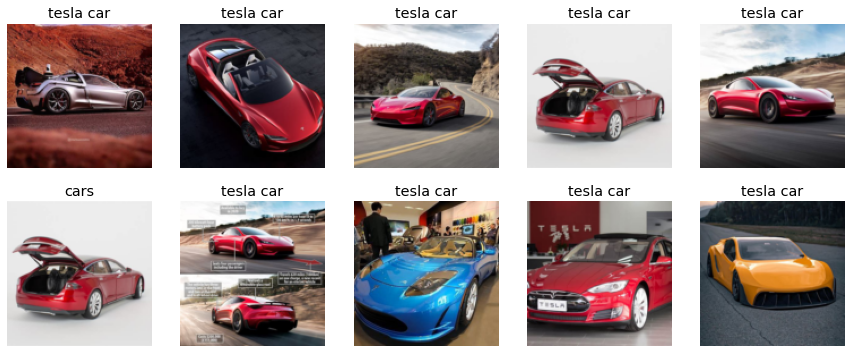

In [12]:
data_load.valid.show_batch(max_n=10 , nrows=2)

In [13]:
data = data.new(item_tfms=Resize(128), batch_tfms=aug_transforms())
data_load = data.dataloaders(path)
 

In [14]:
model = cnn_learner(data_load, resnet18 , metrics=error_rate)
model.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.254043,0.499109,0.192771,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.977554,0.556164,0.244980,00:06
1,0.851975,0.350830,0.160643,00:06
2,0.769036,0.281663,0.120482,00:06
3,0.655551,0.315679,0.128514,00:06
4,0.563941,0.214807,0.076305,00:06
5,0.474785,0.215472,0.064257,00:06
6,0.396982,0.209278,0.064257,00:06
7,0.334569,0.200725,0.064257,00:06
8,0.282351,0.192545,0.064257,00:06
9,0.247453,0.193142,0.064257,00:06


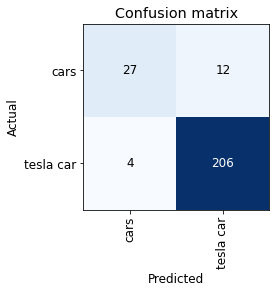

In [15]:
interp= ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix( )

Hey I am 96.0105% sure that this image is a Tesla !


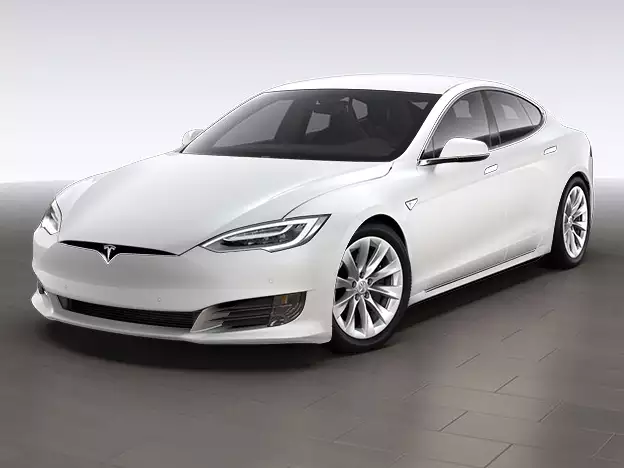

In [26]:
tst= (path/'test')
tst.mkdir(exist_ok=True)
img = download_images(tst,urls=['https://www.businessinsider.in/photo/52674243/with-model-3-demand-surging-tesla-is-bringing-back-a-66000-version-of-its-model-s.jpg'])
image = PILImage.create('/content/images/test/00000000.jpg')

pred, predId, prob = model.predict('/content/images/test/00000000.jpg')
if pred=='cars':
     print(f'Hey I am {prob[predId]*100:.04f} % sure that this image is a NOT a Tesla  ')
else :
     print(f'Hey I am {prob[predId]*100:.04f}% sure that this image is a Tesla !')
image

In [ ]:
# btn_upload = widgets.FileUpload()

# btn = widgets.Button(description='Classify')

# pic_wd = widgets.Output()
# pic_wd.clear_output()

# verdict = widgets.Label()

In [ ]:
# def onClickHandler(change):
#   img = PILImage.create(btn_upload.data[-1])
#   pic_wd.clear_output()
#   with pic_wd : display(img.to_thumb(204,204))
#   pred, predId, prob = model.predict(img)
#   if pred=='cars':
#     verdict.value=f'Hey I am {prob[predId]*100:.04f} % sure that this image is a NOT a Tesla  '
#   else :
#     verdict.value=f'Hey I am {prob[predId]*100:.04f}% sure that this image is a Tesla !'

# btn.on_click(onClickHandler)

In [ ]:
# VBox([widgets.Label('Tesla or Not !'),btn_upload,btn,pic_wd,verdict])
 